<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/UNet%2B%2B_A_Nested_U_Net_Architecture_for_Medical_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNet++: A Nested U-Net Architecture for Medical Image Segmentation**

논문 링크: https://arxiv.org/abs/1807.10165

UNet++는 기존 classification에서 좋은 성능을 보여줬던 DenseNet에 영감을 받아 UNet에 dense block 아이디어를 적용하여 성능을 향상시킨 것이다.

## **UNet++ 구조**

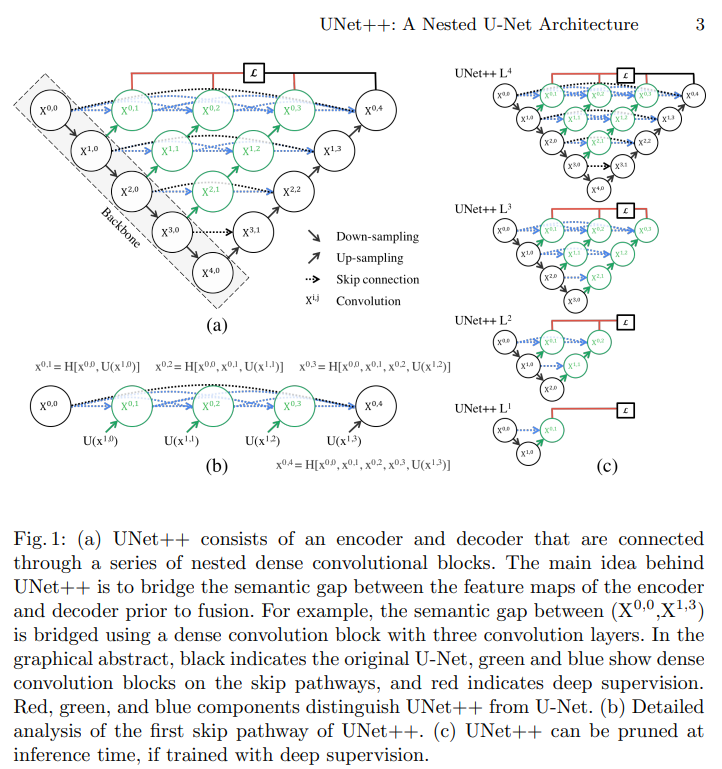

위의 그림 Figure 1을 보면 UNet++이 일련의 중첩된 dense convolution layer를 통해 연결된 encoder와 decoder로 구성이 되는 것을 알 수 있다. UNet++의 기본적적인 아이디어는 fusion 이전에 encoder와 decoder의 feature map 사이의 semantic gap을 연결하는 것이다. 예시를 들어 위의 그림 Figure 1의 (a) 부분에서 X^(0,0)과 X^(1,3) 사이의 semantic gap은 세 개의 convolution layer가 있는 dense convolution block으로 semantic gap을 연결하는 것이다.

기본적으로 dense convolution block은 encoder feature map과 decoder feature map의 semantic level을 더 가깝게 만든다.

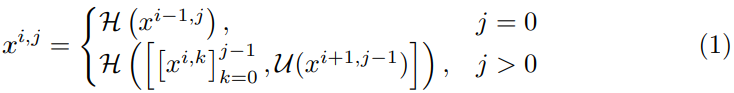

x^(i,j)가 X^(i,j)의 output일 때, i는 encoder를 따라 down-sampling layer를 인덱싱하고, j는 skip pathway를 따라 dense block의 convolution layer를 인덱싱한다.

그리고 x^(i,j)로 표시되는 feature map은 위의 식과 같이 나타낼 수 있다.

H()는 convolution 후 진행하는 activation function이며. U()는 up-sampling, []는 concatenation layer를 나태난다.

또한, 위의 그림 Figure 1에서 (c) 부분가 같이 segmentation branch를 선택하는 deep supervision을 사용한다. deep supervision이란, 모든 segmemtation branch들로 부터 출력된 output의 평균화하는 정확한 모드나, 최종 segmentation map이 segmentaton branch 중 하나만 선택하는 고속 모드로써, 그러한 선택은 모델 pruning 정도와 속도 이득에 영향을 준다.

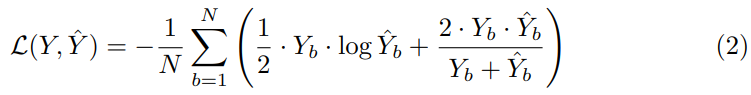

중첩된 skip pathway로 인해 UNet++은 여러 segmentic level에서 전체 resolution의 feature map을 생성한다. 따라서 손실을 4개의 segmentic level로 부터 계산한다. 이때 loss는 binary cross-entropy와 dice coefficient를 결합한 것을 사용한다. 위의 식에서 N은 batch size이다.

## **Experiments**

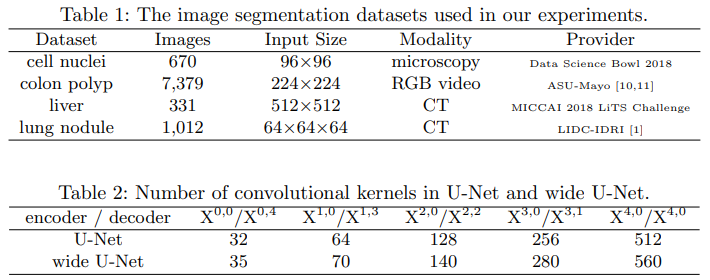

위의 표 Table 1과 같이 서로 다른 의료 영상 양식(modalities)의 병변(lesions)/ 기관(organs)을 아우르는, 네 개의 메디컬 이미지 데이터셋을 사용하여 모델을 평가하였다.

위의 표 Table 2에서는 기존의 UNet과 wide UNet을 비교한 것이다.

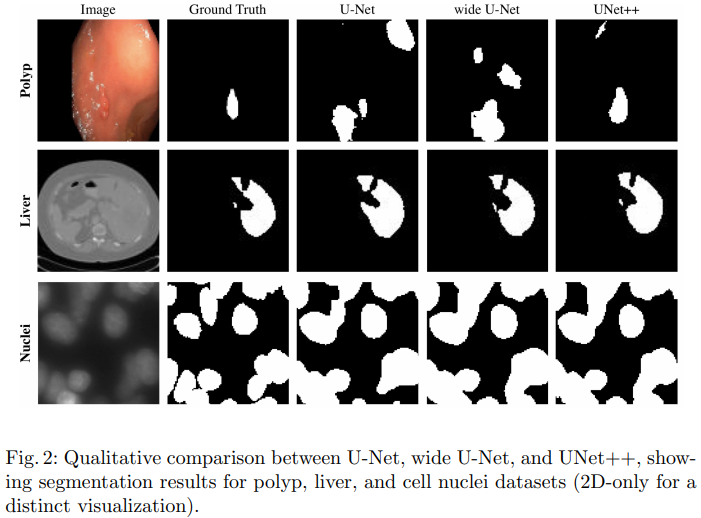

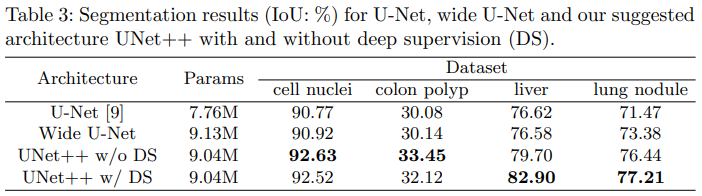

위의 그림 Figure 2와 표 Table 3은 비교 결과를 각각 결과물과 수치로 보여준다. Deep Supervision이 없는 U-Net++는 U-Net과Wide U-Net양쪽의 점수보다 더 좋은 성능을 달성하였다. IoU점수에서 평균이 2.8에서 3.3으로 향상되었다. 그리고 Deep Supervision이 있는 U-Net++는 Deep Supervision이 없는 U-Net++보다 0.6점이 향상되었다.

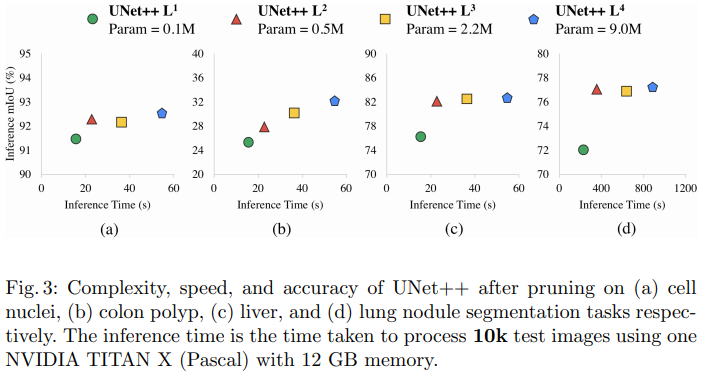

마지막으로 위의 그림 Figure 3을 보면 UNet++ L^3는 IoU는 0.6 point만 저하시키면서 평균 32.2%의 inference 시간을 단축시킨다. 보다 적극적인 pruning은 inference 시간을 줄일 수 있지만, accuracy는 떨어지는 즉, trade-off 관계가 나타난다.